# La régression logistique

## Pourquoi la régression logistique ?

La régression logistique est un __modèle linéaire généralisé__ qui permet de répondre au cas où la variable dépendante (celle qu'on cherche à expliquer) est qualitative. Les variables explicatives (ou indépendantes) peuvent être quantitative ou qualitative.  
Il existe trois types de régressions logistiques :
- la régression logistique ordinaire ou régression logistique binaire lorsque la variable d’intérêt est binaire (oui/non, vrai/faux)
- la régression logistique multinomiale qui est une extension aux variables qualitatives à trois modalités ou plus
- la régression logistique ordinale qui correspond au cas où la variable qualitative au moins 3 modalités ordonnées hiérarchiquement

Exemples de problèmes :
- déterminer si un objet est défectueux en fonction par exemple du matériau utilisé, de la température de fabrication, de l'humidité, etc...
- déterminer si un client a cliqué sur l'offre promotionnelle contenue dans un email selon différentes caractéristiques individuelles (âge, sexe, urbain/rural, etc...).Plus généralement les problèmes de segmentation de clients
- déterminer si un email est un SPAM ou non
- en médicine : déterminer si une tumeur est maligne/bénine, si un médicament permet la guérison ou non, etc...

$\Rightarrow$ ce sont des problèmes de __classification__

## Intuition de la régression logistique

### Importer et afficher les données email_offer.csv

In [1]:
import pandas as pd
df = pd.read_csv("data/email_offer.csv")
df

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0
...,...,...,...
95,31,Male,0
96,49,Male,1
97,36,Male,0
98,32,Female,0


### Tracer le scatter plot de y (TookAction) en fonction de x (Age)

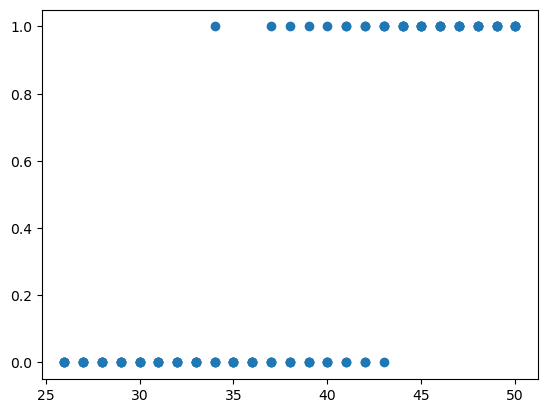

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.Age, df.TookAction);

### Entrainer un modèle de régression linéaire et afficher la droite de régression sur le scatter plot

In [3]:
df[['Age']].shape, df['Age'].shape, df.Age.shape

((100, 1), (100,), (100,))

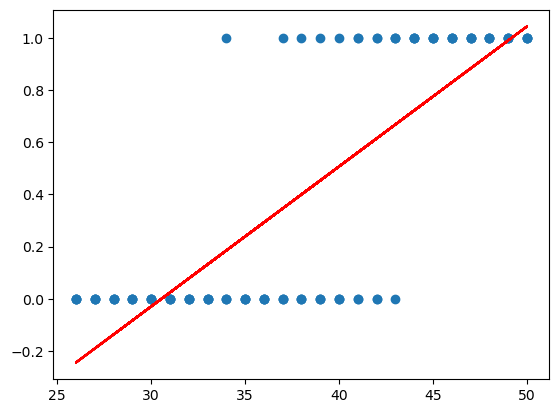

In [4]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression() # instanciation
x, y = df[['Age']], df[['TookAction']] # données
reglin.fit(x, y) # entrainement
y_pred = reglin.predict(x)

# visualisation
plt.scatter(x,y)
plt.plot(x, y_pred, c='r')
plt.show()

### Coder la fonction sigmoïde et afficher son graphe

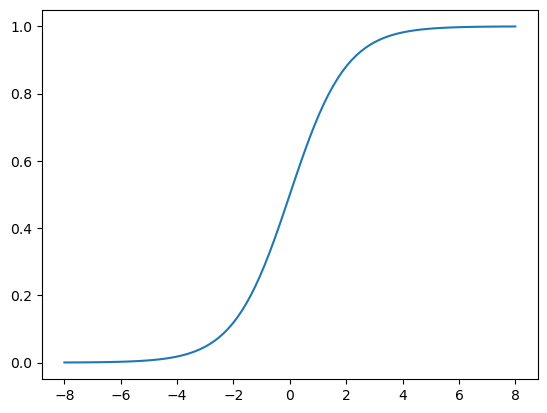

In [5]:
# avec math
from math import exp
import numpy as np

def sigmoid(t):
    return 1/(1+exp(-t))

x_values = np.linspace(-8, 8, 100)
plt.plot(x_values, [sigmoid(x) for x in x_values]);

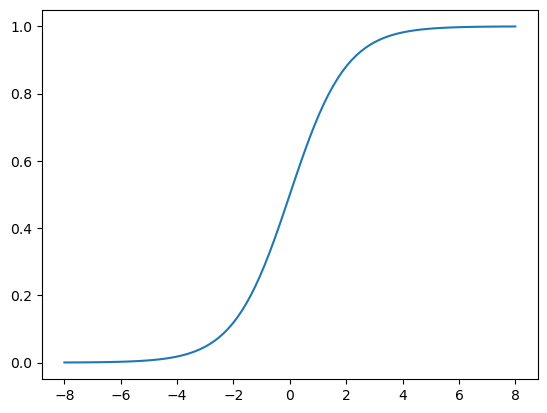

In [6]:
# avec l'exponentielle de numpy
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_values = np.linspace(-8, 8, 100)
plt.plot(x_values, sigmoid(x_values));

## Une première régression logistique

### Construire un premier modèle de régression logistique avec uniquement l'âge comme variable explicative

In [7]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression() # instanciation
x, y = df[['Age']], df['TookAction'] # données
reglog.fit(x, y) # entrainement

# prédictions
y_pred = reglog.predict(x)
prob_pred = reglog.predict_proba(x)
#y_pred, prob_pred2

### Afficher sur un même graphique, le scatter plot, la droite de régression et les probabilités

In [8]:
# il faut trier par âge croissants pour que les plot soient lisibles
y_pred = reglog.predict(x.sort_values(by='Age'))
prob_pred = reglog.predict_proba(x.sort_values(by='Age'))

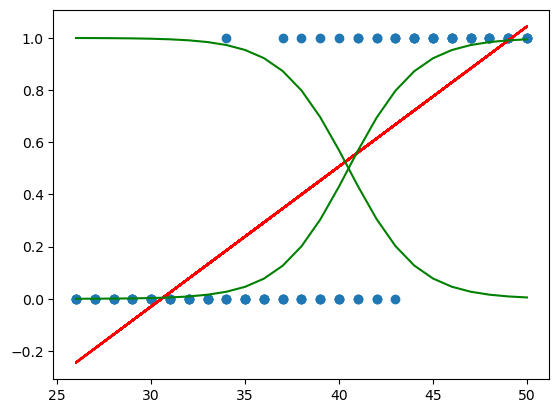

In [9]:
plt.scatter(x,y)
plt.plot(x, reglin.predict(x), c='r')
plt.plot(x.sort_values(by='Age'), prob_pred, c='g');

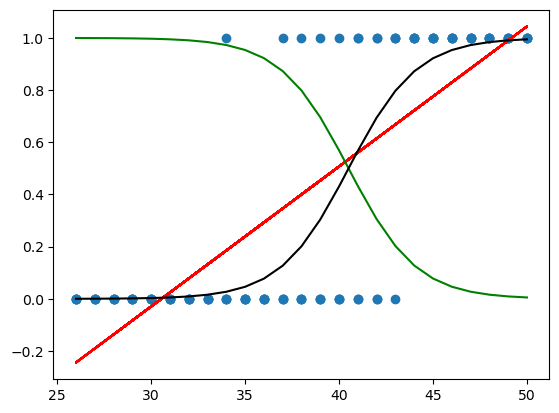

In [10]:
plt.scatter(x,y)
plt.plot(x, reglin.predict(x), c='r')
plt.plot(x.sort_values(by='Age'), prob_pred[:,0], c='g')
plt.plot(x.sort_values(by='Age'), prob_pred[:,1], c='black');

### Construire un second modèle de régression logistique avec cette fois l'âge et le genre comme variables explicatives et visualiser sur les résultats sur le même graphique que précédemment

In [11]:
X = df[['Age', 'Gender']]
y = df['TookAction']

# gestion de la variable catégorique Genre
X = pd.get_dummies(X, drop_first=True)

# régression logistique
reglog2 = LogisticRegression() # instanciation
reglog2.fit(X, y) # entrainement

# prédictions
y_pred2 = reglog2.predict(X)
prob_pred2 = reglog2.predict_proba(X)

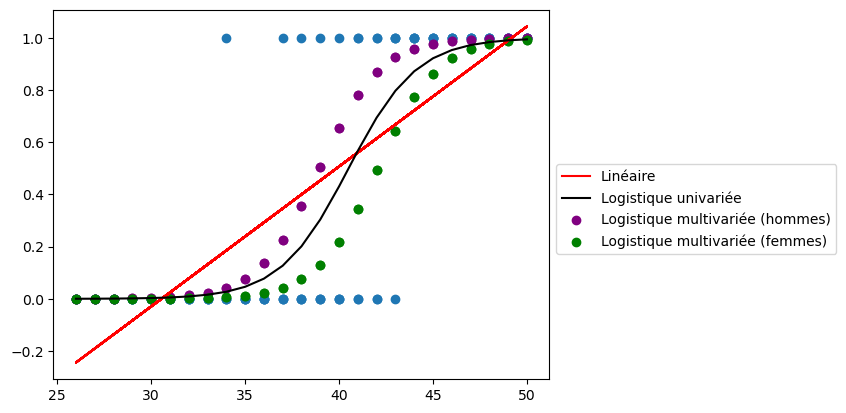

In [12]:
# visualisation
plt.scatter(x,y)
plt.plot(x, reglin.predict(x), c='r', label='Linéaire')
plt.plot(x.sort_values(by='Age'), prob_pred[:,1], c='black', label='Logistique univariée')
plt.scatter(x[X.Gender_Male==1], prob_pred2[X.Gender_Male==1,1], c='purple', label='Logistique multivariée (hommes)')
plt.scatter(x[X.Gender_Male==0], prob_pred2[X.Gender_Male==0,1], c='green', label='Logistique multivariée (femmes)')
plt.legend(bbox_to_anchor=(1, 0.6));

## Évaluation du modèle

### Matrice de confusion

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred2)

array([[57,  3],
       [ 3, 37]])

In [14]:
# dans un dataframe
pd.DataFrame(confusion_matrix(y,y_pred2),
            columns=[f'predit {c}' for c in reglog2.classes_],
            index=[f'vrai {c}' for c in reglog2.classes_])

,predit 0,predit 1
vrai 0,57,3
vrai 1,3,37


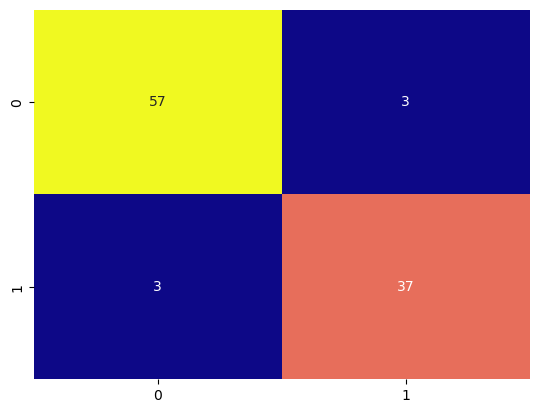

In [15]:
# avec un heatmap
import seaborn as sns
sns.heatmap(confusion_matrix(y,y_pred2), annot=True, cmap='plasma', cbar=False);

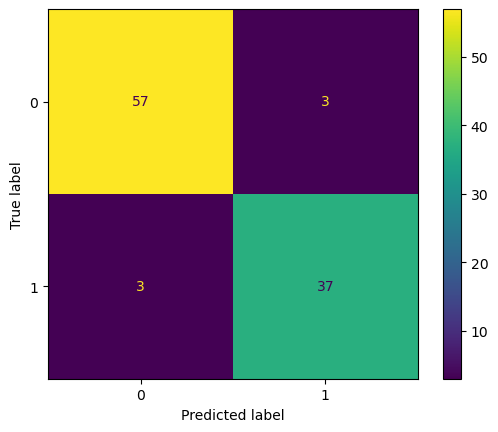

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, y_pred2);

### Affichage des probabilités

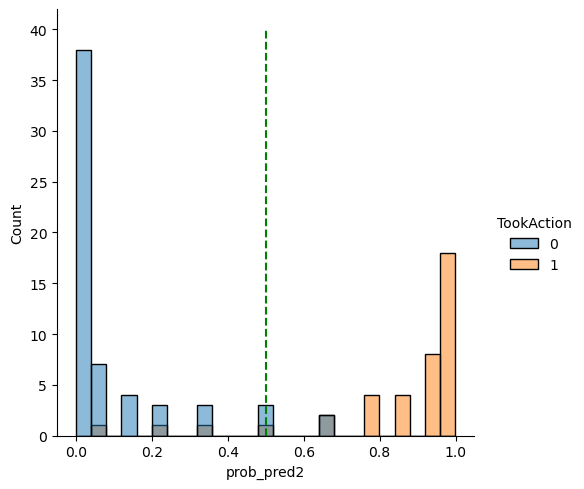

In [17]:
df_viz = df.copy()
df_viz['prob_pred2'] = reglog2.predict_proba(X)[:,1]
sns.displot(data=df_viz, x='prob_pred2', bins=25, hue='TookAction')
plt.plot([0.5, 0.5], [0,40], 'g--');

### Courbe ROC et AUC

In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
p1 = reglog2.predict_proba(X)[:,1]
fpr, tpr, seuils = roc_curve(y, p1, drop_intermediate=False)

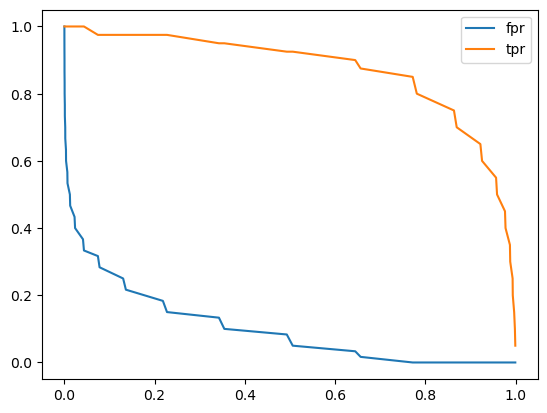

In [19]:
plt.plot(seuils[1:], fpr[1:], label='fpr')
plt.plot(seuils[1:], tpr[1:], label='tpr')
plt.legend();

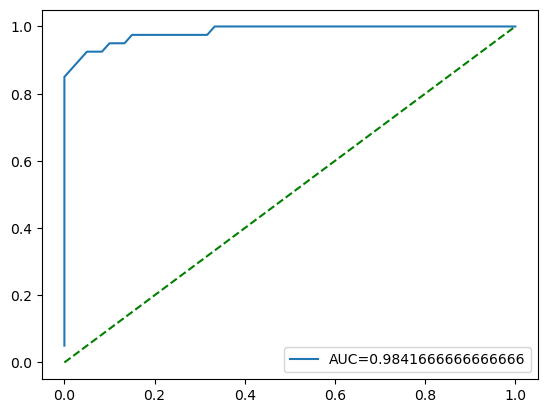

In [20]:
# courbe ROC et AUC
plt.plot(fpr[1:], tpr[1:], label=f"AUC={auc(fpr[1:], tpr[1:])}")
plt.plot([0,1], [0,1], "g--")
plt.legend();

## Interprétation des coefficients

In [21]:
print(reglog2.feature_names_in_)
print(reglog2.intercept_)
print(reglog2.coef_)

['Age' 'Gender_Male']
[-26.2123103]
[[0.62341051 1.92283404]]


In [22]:
coefs = pd.DataFrame(np.concatenate([reglog2.intercept_, reglog2.coef_[0]]),
                    columns = ['Coefficients'],
                    index = ["Const"]+list(reglog2.feature_names_in_))
coefs['Odds-ratio'] = np.exp(coefs.Coefficients)
coefs

,Coefficients,Odds-ratio
Const,-26.212310,4.131790e-12
Age,0.623411,1.865279e+00
Gender_Male,1.922834,6.840317e+00


### Avec statsmodels

In [23]:
import statsmodels.formula.api as smf

df = pd.get_dummies(df, drop_first=True, prefix="", prefix_sep="")

reglog3 = smf.logit('TookAction ~ Age + Male', df).fit()
reglog3.summary()

Optimization terminated successfully.
         Current function value: 0.148067
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TookAction   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.7800
Time:                        14:06:53   Log-Likelihood:                -14.807
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                 1.592e-23
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -38.1520      9.987     -3.820      0.000     -57.726     -18.578
Male[T.True]     4.4374      1.492      2.974      0.003       1.513       7.361
Age              0.8872      0.232      3.828      0.000       0.433       1.342
================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [24]:
np.exp(reglog3.params)
np.exp(reglog3.conf_int(alpha=0.05))

,0,1
Intercept,8.510430e-26,8.544451e-09
Male[T.True],4.541482e+00,1.574195e+03
Age,1.541771e+00,3.824851e+00
